In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Путь к файлу с данными по широте,долготе и тяжести льда.
path_excel = 'IntegrVelocity.xlsx'

## Загрузка данных с широтой и долготой пространственной сетки в полярной стереографической проекции

In [3]:
# Загрузка данных широты и долготы сетки. Каждая пара - левый вверхний угол участка 25х25 км.
Velocity_lon = pd.read_excel(path_excel, sheet_name='lon', header=None)
Velocity_lat = pd.read_excel(path_excel, sheet_name='lat', header=None)

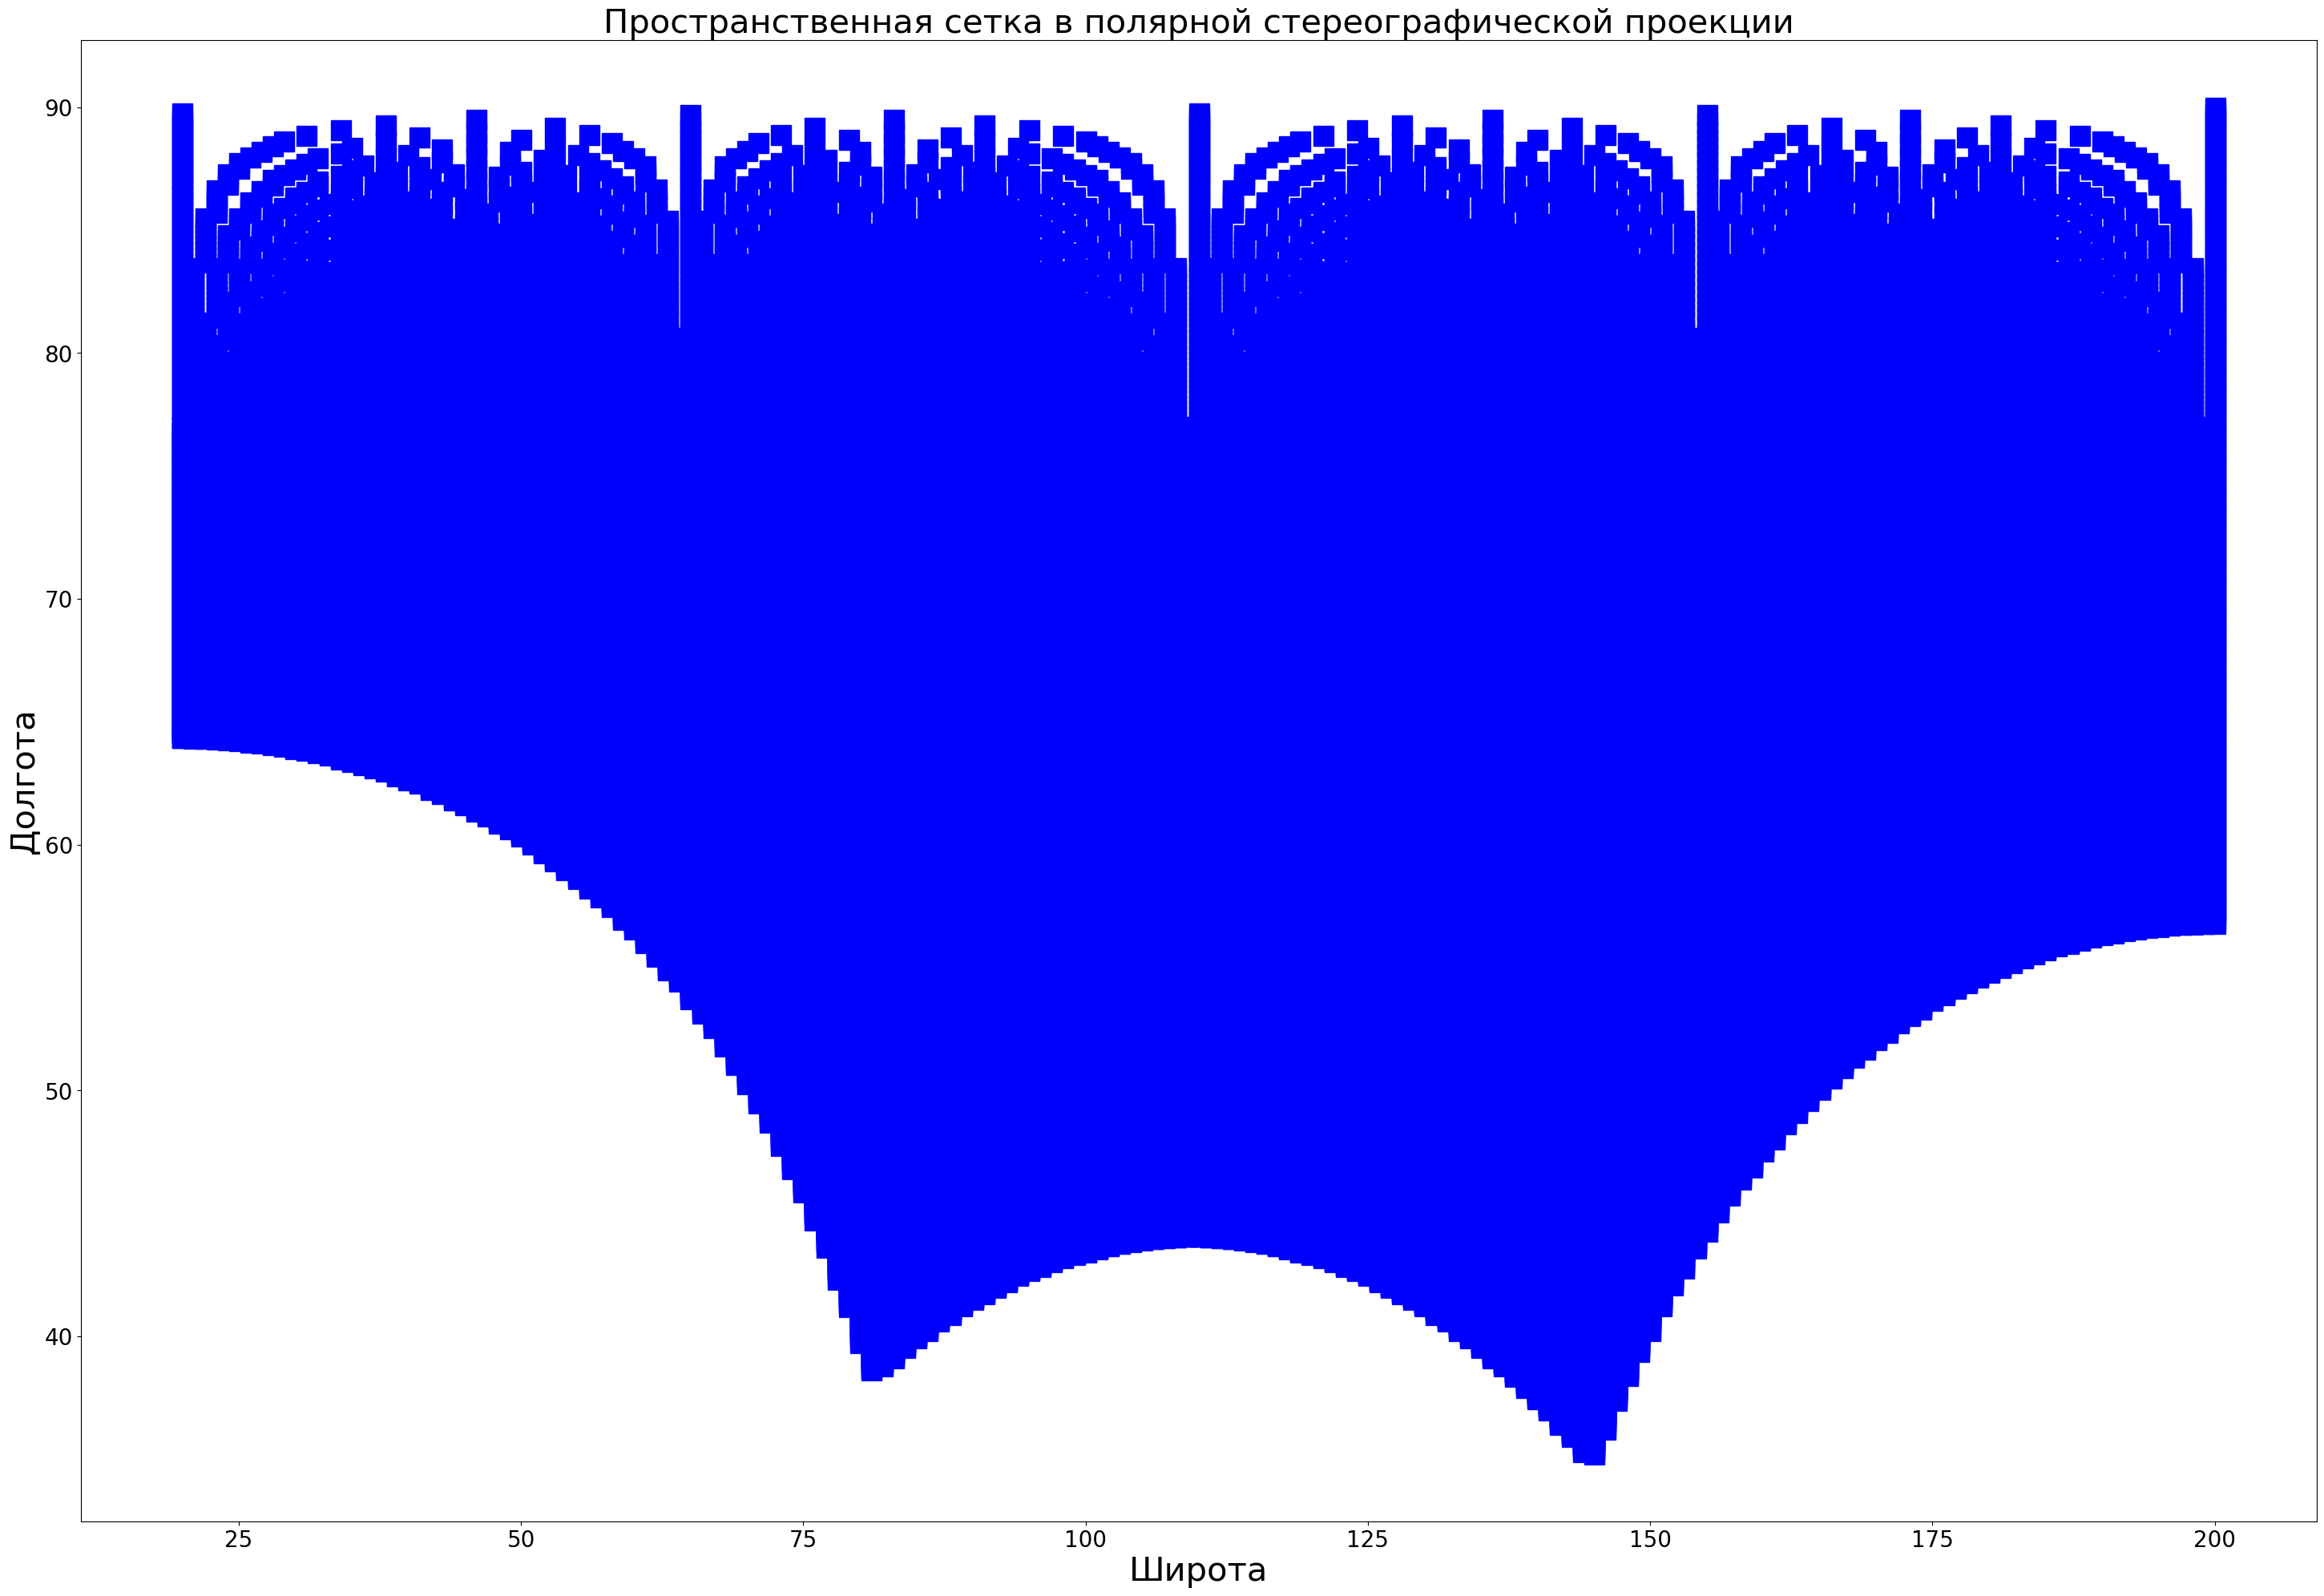

In [4]:
fig, ax = plt.subplots(figsize=(36,24))
ax.plot(Velocity_lon.values.tolist(), Velocity_lat.values.tolist(), markersize=18,  color='blue', marker ='s', linestyle='None',zorder=1)
plt.title('Пространственная сетка в полярной стереографической проекции', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.savefig('image.png')
plt.show()

## Загрузка данных по тяжести льда для пространственной сетки

In [5]:
def plot_ice_map(path_excel, sheet_name, Velocity_lat, Velocity_lon):
    '''
        path_excel - путь к эксель файлу
        sheet_name - название листа чтения
        Velocity_lat - таблица pandas с широтой 
        Velocity_lon - таблица pandas с долготой

        На выходе изображение пространственной сетки с указанием тяжести льда на ней. Каждый цвет соответствует диапазону значений тяжести льда.
        Указаны в легенде на графике.
    '''
    Velocity_day = pd.read_excel(path_excel, sheet_name=sheet_name, header=None)
    color_df = Velocity_day.copy()
    
    color_df[Velocity_day < 0] = 'gray'
    color_df[(Velocity_day >= 0)&(Velocity_day <= 10)] = 'beige'
    color_df[(Velocity_day > 10)&(Velocity_day <= 15)] = 'royalblue'
    color_df[(Velocity_day > 15)&(Velocity_day <= 19)] = 'mediumblue'
    color_df[Velocity_day > 19] = 'darkblue'
    
    fig, ax = plt.subplots(figsize=(24,12))
    for i in range(Velocity_lat.shape[0]):
        for j in range(Velocity_lat.shape[1]):
            data_lat = Velocity_lat.iloc[i,j]
            data_lon = Velocity_lon.iloc[i,j]
            color_ = color_df.iloc[i,j]
            ax.plot(data_lon, data_lat, markersize=18,  color=color_, marker ='s', linestyle='None')
            
    plt.title(f'Пространственная сетка {sheet_name}', fontsize=30)
    gray_patch = mpatches.Patch(color='gray', label='Тяжесть льда < 0')
    beige_patch = mpatches.Patch(color='beige', label='0 <= Тяжесть льда < 10')
    royalblue_patch = mpatches.Patch(color='royalblue', label='10 <= Тяжесть льда < 15')
    mediumblue_patch = mpatches.Patch(color='mediumblue', label='15 <= Тяжесть льда < 19')
    darkblue_patch = mpatches.Patch(color='darkblue', label='Тяжесть льда >= 19')
    plt.legend(handles=[gray_patch,darkblue_patch, mediumblue_patch,beige_patch,royalblue_patch],loc='lower left')
    plt.xlabel('Широта', fontsize=30)
    plt.xticks(fontsize = 20)
    plt.ylabel('Долгота', fontsize=30)
    plt.yticks(fontsize = 20)
    plt.show()

In [6]:
xls = pd.ExcelFile(path_excel)
print('Даты расчетов тяжести льда:',xls.sheet_names[2:])

Даты расчетов тяжести льда: ['03-Mar-2020', '10-Mar-2020', '17-Mar-2020', '24-Mar-2020', '31-Mar-2020', '02-Apr-2020', '07-Apr-2020', '14-Apr-2020', '21-Apr-2020', '28-Apr-2020', '05-May-2020', '12-May-2020', '19-May-2020', '26-May-2020']


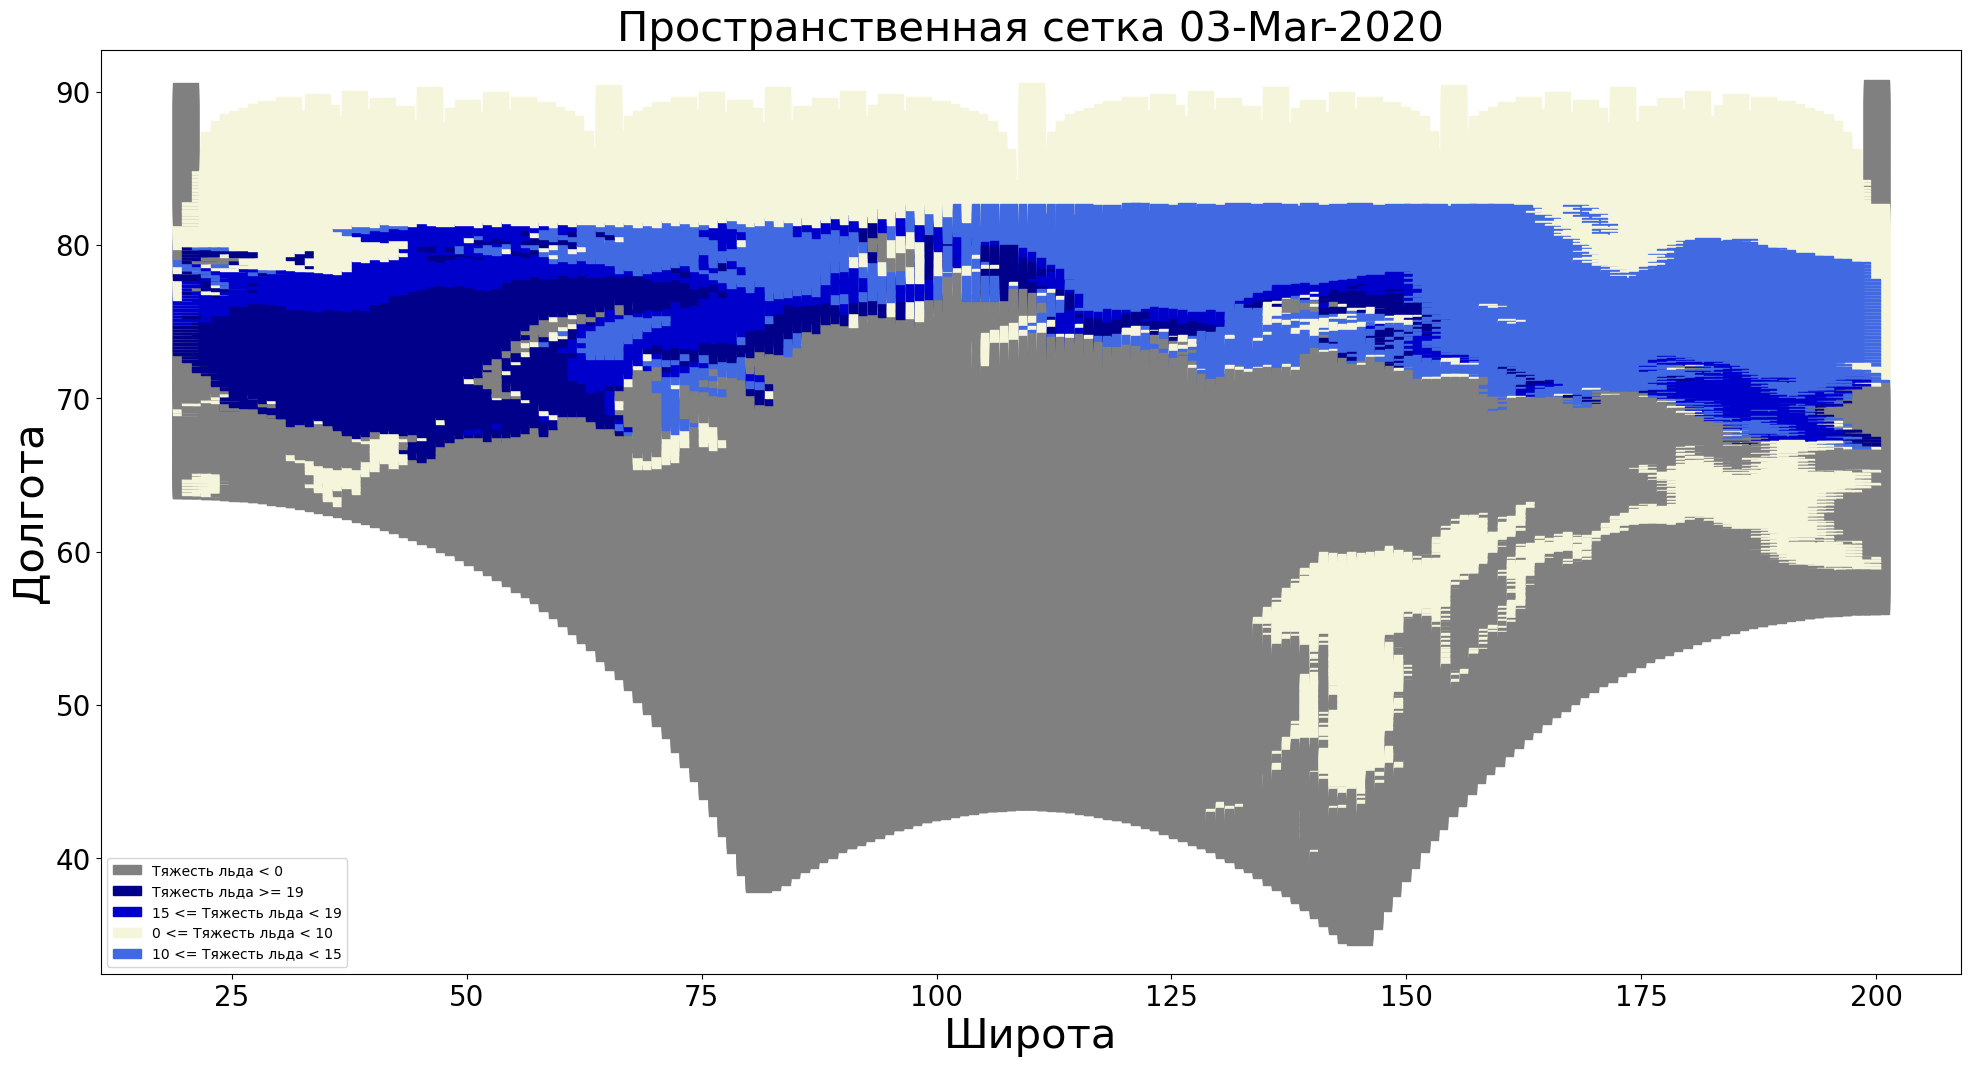

In [7]:
plot_ice_map(path_excel, xls.sheet_names[2], Velocity_lat, Velocity_lon)

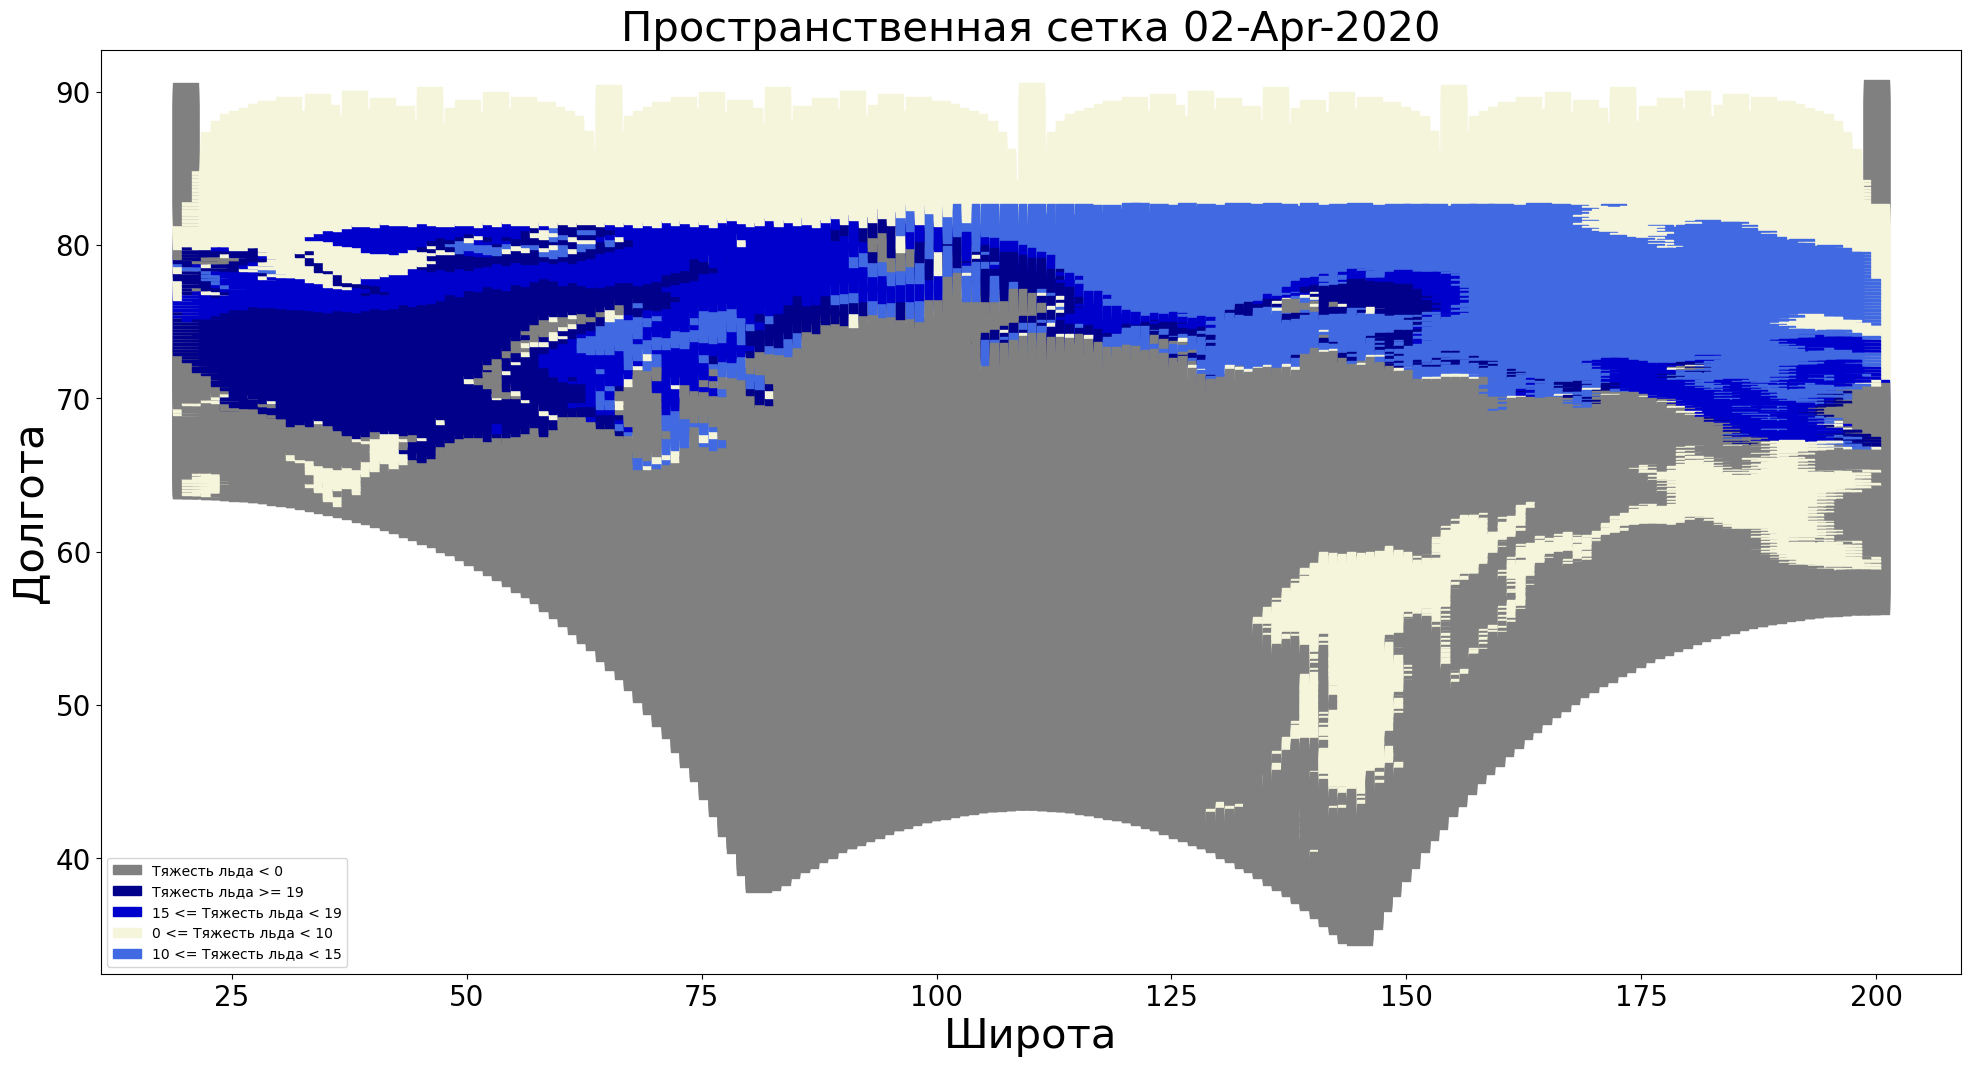

In [8]:
plot_ice_map(path_excel, xls.sheet_names[7], Velocity_lat, Velocity_lon)

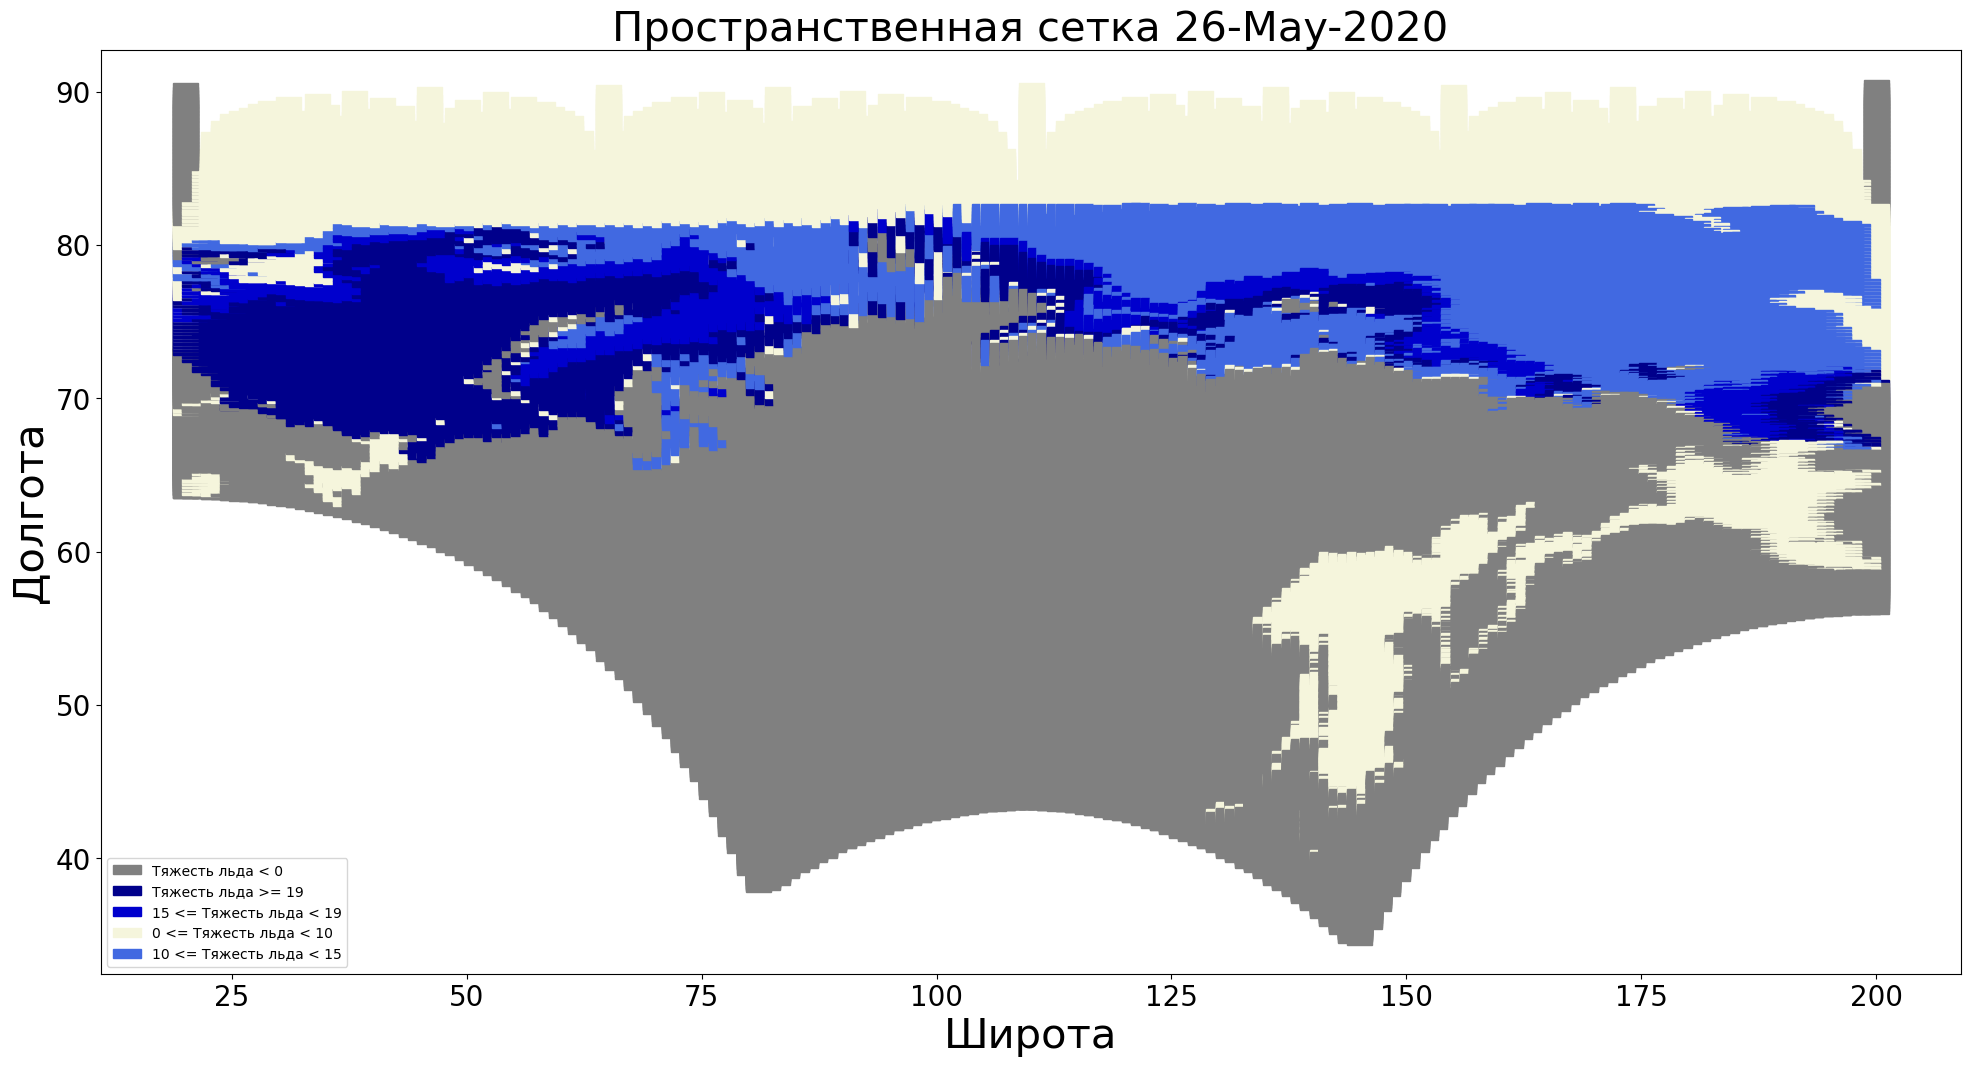

In [9]:
plot_ice_map(path_excel, xls.sheet_names[-1], Velocity_lat, Velocity_lon)

Была построенна пространственная сетка в полярной стереографической проекции. Визуализировали значения тяжести льда на пространственной сетке. Каждому диапазону был присвоен свой цвет, который указан в легенде на графике.

## Загрузка данных графов

In [10]:
graph_points = pd.read_excel('ГрафДанные.xlsx', sheet_name='points')
graph_edges = pd.read_excel('ГрафДанные.xlsx', sheet_name='edges')

In [11]:
graph_points[['latitude','longitude']].min(), graph_points[['latitude','longitude']].max()

(latitude      55.70
 longitude   -169.35
 dtype: float64,
 latitude      77.8
 longitude    188.2
 dtype: float64)

В данных по узлам графа присутствуют отрицательные значения, чтобы преобразовать в положительное значения необходимо сложить с 360.

In [12]:
# Отрицательное значение для бериногов пролив, переводим в положительное для отображения
graph_points.loc[graph_points[graph_points.longitude < 0].longitude.index, 'longitude'] = 360 + graph_points[graph_points.longitude < 0].longitude.values
# Номера гарфов узла для специального отображения на графике.
point_invert = [41,29,3,31,11,35,14,43,36]

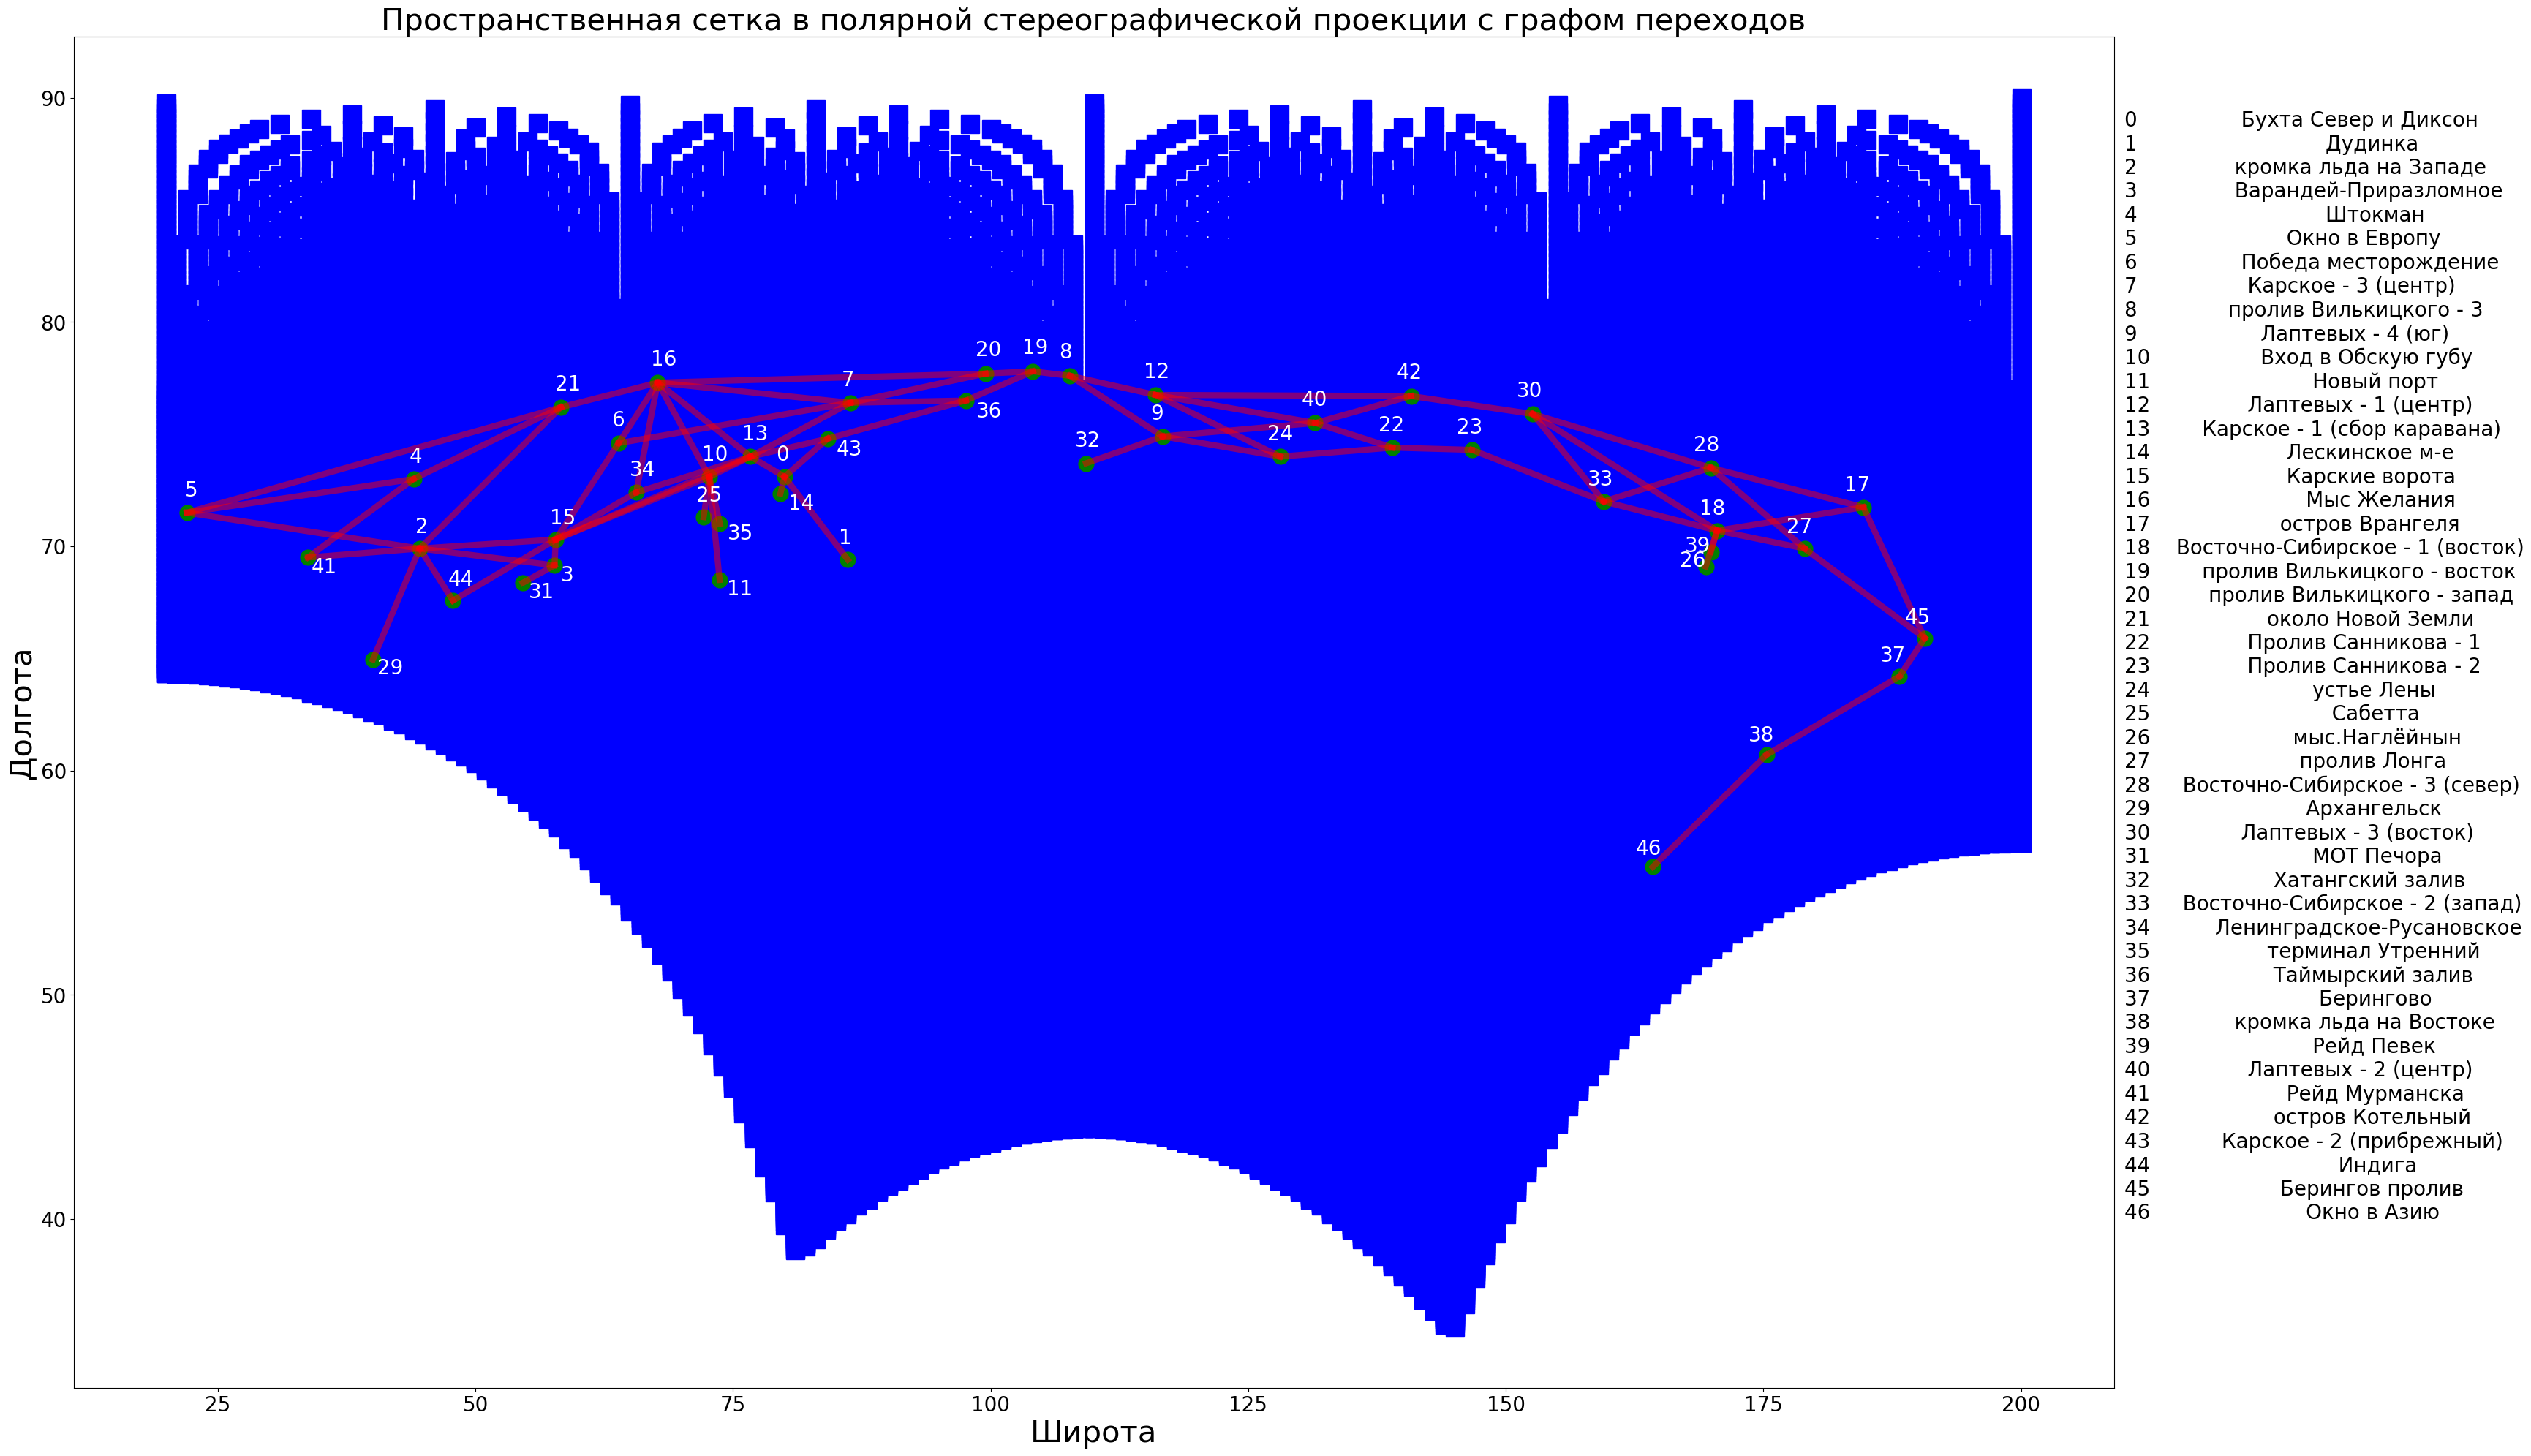

In [13]:
# Координаты и названия для узлов графа
x = graph_points.longitude.values.tolist()
y = graph_points.latitude.values.tolist()
txt = graph_points.point_id.values.tolist()
name = graph_points.point_name.values.tolist()

fig, ax = plt.subplots(figsize=(36,24))
ax.plot(Velocity_lon.values.tolist(), Velocity_lat.values.tolist(), markersize=18,  color='blue', marker ='s', linestyle='None',zorder=1)
ax.scatter(x, y, c='g',zorder=2, linewidths=10)

for i, txt_ in enumerate(txt):
    if txt_ in point_invert:
        ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*1.01, y[i]*0.99), size=20, c='w')
        continue
    if (txt_ == 26) or (txt_ == 39):
        ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.985, y[i]), size=20, c='w')
        continue
    ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.99, y[i]*1.01), size=20, c='w')
# Построение ребер графа
for j in range(len(graph_edges)):
    start_point = graph_edges.iloc[j,:].start_point_id
    end_point = graph_edges.iloc[j,:].end_point_id
    start_data = graph_points[graph_points.point_id == start_point][['latitude','longitude']]
    x1 = start_data.longitude.values.tolist()
    y1 = start_data.latitude.values.tolist()
    end_data = graph_points[graph_points.point_id == end_point][['latitude','longitude']]
    x2 = end_data.longitude.values.tolist()
    y2 = end_data.latitude.values.tolist()
    ax.plot([x1, x2], [y1, y2], zorder=2, color='red', linewidth=6, alpha=0.5)

plt.text(210, 40, f'{graph_points.point_name.to_string()}', fontsize = 20)
plt.title('Пространственная сетка в полярной стереографической проекции c графом переходов', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.show()

Изображение каждого ребра графа, случайным цветом

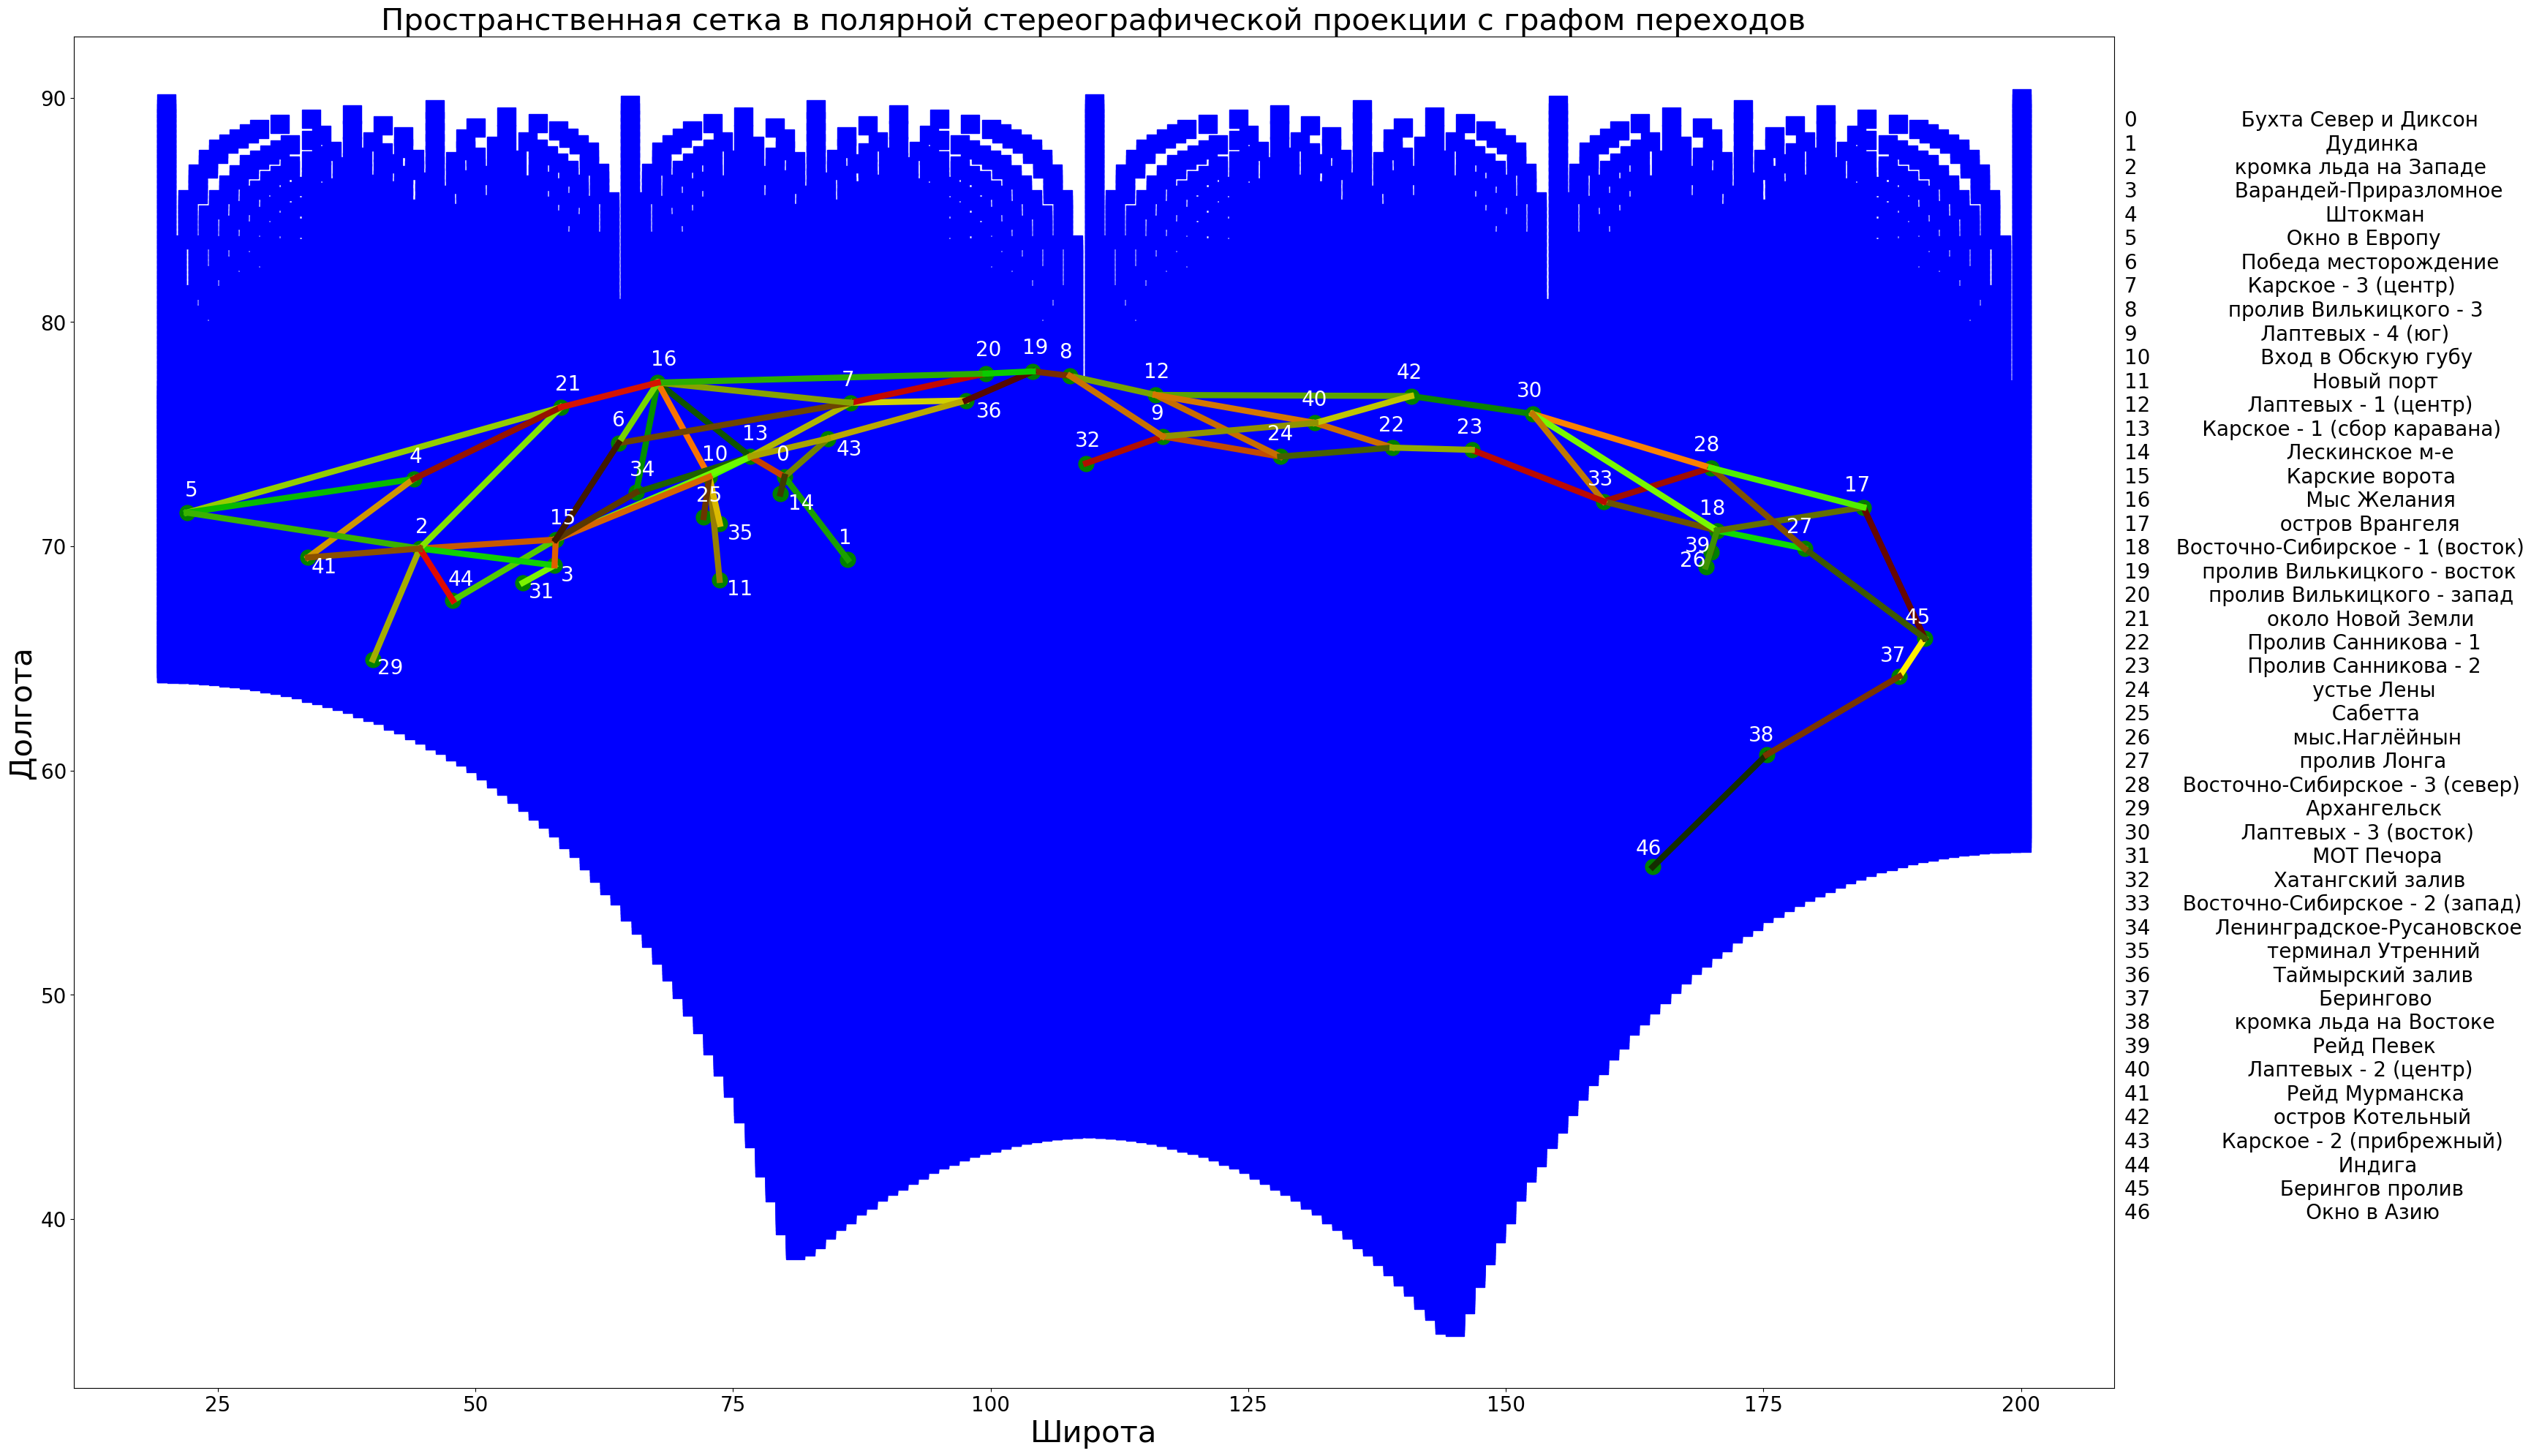

In [14]:
# Координаты и названия для узлов графа
x = graph_points.longitude.values.tolist()
y = graph_points.latitude.values.tolist()
txt = graph_points.point_id.values.tolist()
name = graph_points.point_name.values.tolist()

fig, ax = plt.subplots(figsize=(36,24))
ax.plot(Velocity_lon.values.tolist(), Velocity_lat.values.tolist(), markersize=18,  color='blue', marker ='s', linestyle='None',zorder=1)
ax.scatter(x, y, c='g',zorder=2, linewidths=10)

for i, txt_ in enumerate(txt):
    if txt_ in point_invert:
        ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*1.01, y[i]*0.99), size=20, c='w')
        continue
    if (txt_ == 26) or (txt_ == 39):
        ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.985, y[i]), size=20, c='w')
        continue
    ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.99, y[i]*1.01), size=20, c='w')
# Построение ребер графа
for j in range(len(graph_edges)):
    start_point = graph_edges.iloc[j,:].start_point_id
    end_point = graph_edges.iloc[j,:].end_point_id
    start_data = graph_points[graph_points.point_id == start_point][['latitude','longitude']]
    x1 = start_data.longitude.values.tolist()
    y1 = start_data.latitude.values.tolist()
    end_data = graph_points[graph_points.point_id == end_point][['latitude','longitude']]
    x2 = end_data.longitude.values.tolist()
    y2 = end_data.latitude.values.tolist()
    color=(random.uniform(0, 1), random.uniform(0, 1), 0)
    ax.plot([x1, x2], [y1, y2], zorder=2, color=color, linewidth=6)

plt.text(210, 40, f'{graph_points.point_name.to_string()}', fontsize = 20)
plt.title('Пространственная сетка в полярной стереографической проекции c графом переходов', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.show()

Построенны данные графов, а именно узлы и ребра. По графикам видно, что узлы №26(мыс.Наглейнын) и №39(Рейд Певек) не имеют между собой общего ребра, но имеют ребро с узлом №18(Восточно-Сибирское - 1(восток)). 

## Загрузка данных расписания и местоположения ледоколов

In [15]:
shedudle = pd.read_excel('Расписание движения судов.xlsx')

shedudle_ships = shedudle.iloc[:42,:].sort_values(by=['Дата начала плавания']).reset_index(drop=True)
shedudle_icebreaker = shedudle.iloc[44:,2:].reset_index(drop=True)
shedudle_icebreaker.columns = shedudle_icebreaker.iloc[0,:]
shedudle_icebreaker = shedudle_icebreaker.iloc[1:,:].dropna()

Добавление широты и долготы для точек маршрута

In [16]:
data = []
for point in shedudle_icebreaker['Начальное положение ледоколов на 27 февраля 2022']:
    data_append = graph_points[graph_points.point_name.str.lower() == point.lower()][['latitude','longitude']].values[0]
    data.append(data_append)
shedudle_icebreaker[['latitude','longitude']] = data

data = []
for point in shedudle_ships['Пункт начала плавания']:
    data_append = graph_points[graph_points.point_name.str.lower() == point.lower()][['latitude','longitude']].values[0]
    data.append(data_append)
shedudle_ships[['latitude_start','longitude_start']] = data

data = []
for point in shedudle_ships['Пункт окончания плавания']:
    data_append = graph_points[graph_points.point_name.str.lower() == point.lower()][['latitude','longitude']].values[0]
    data.append(data_append)
shedudle_ships[['latitude_end','longitude_end']] = data

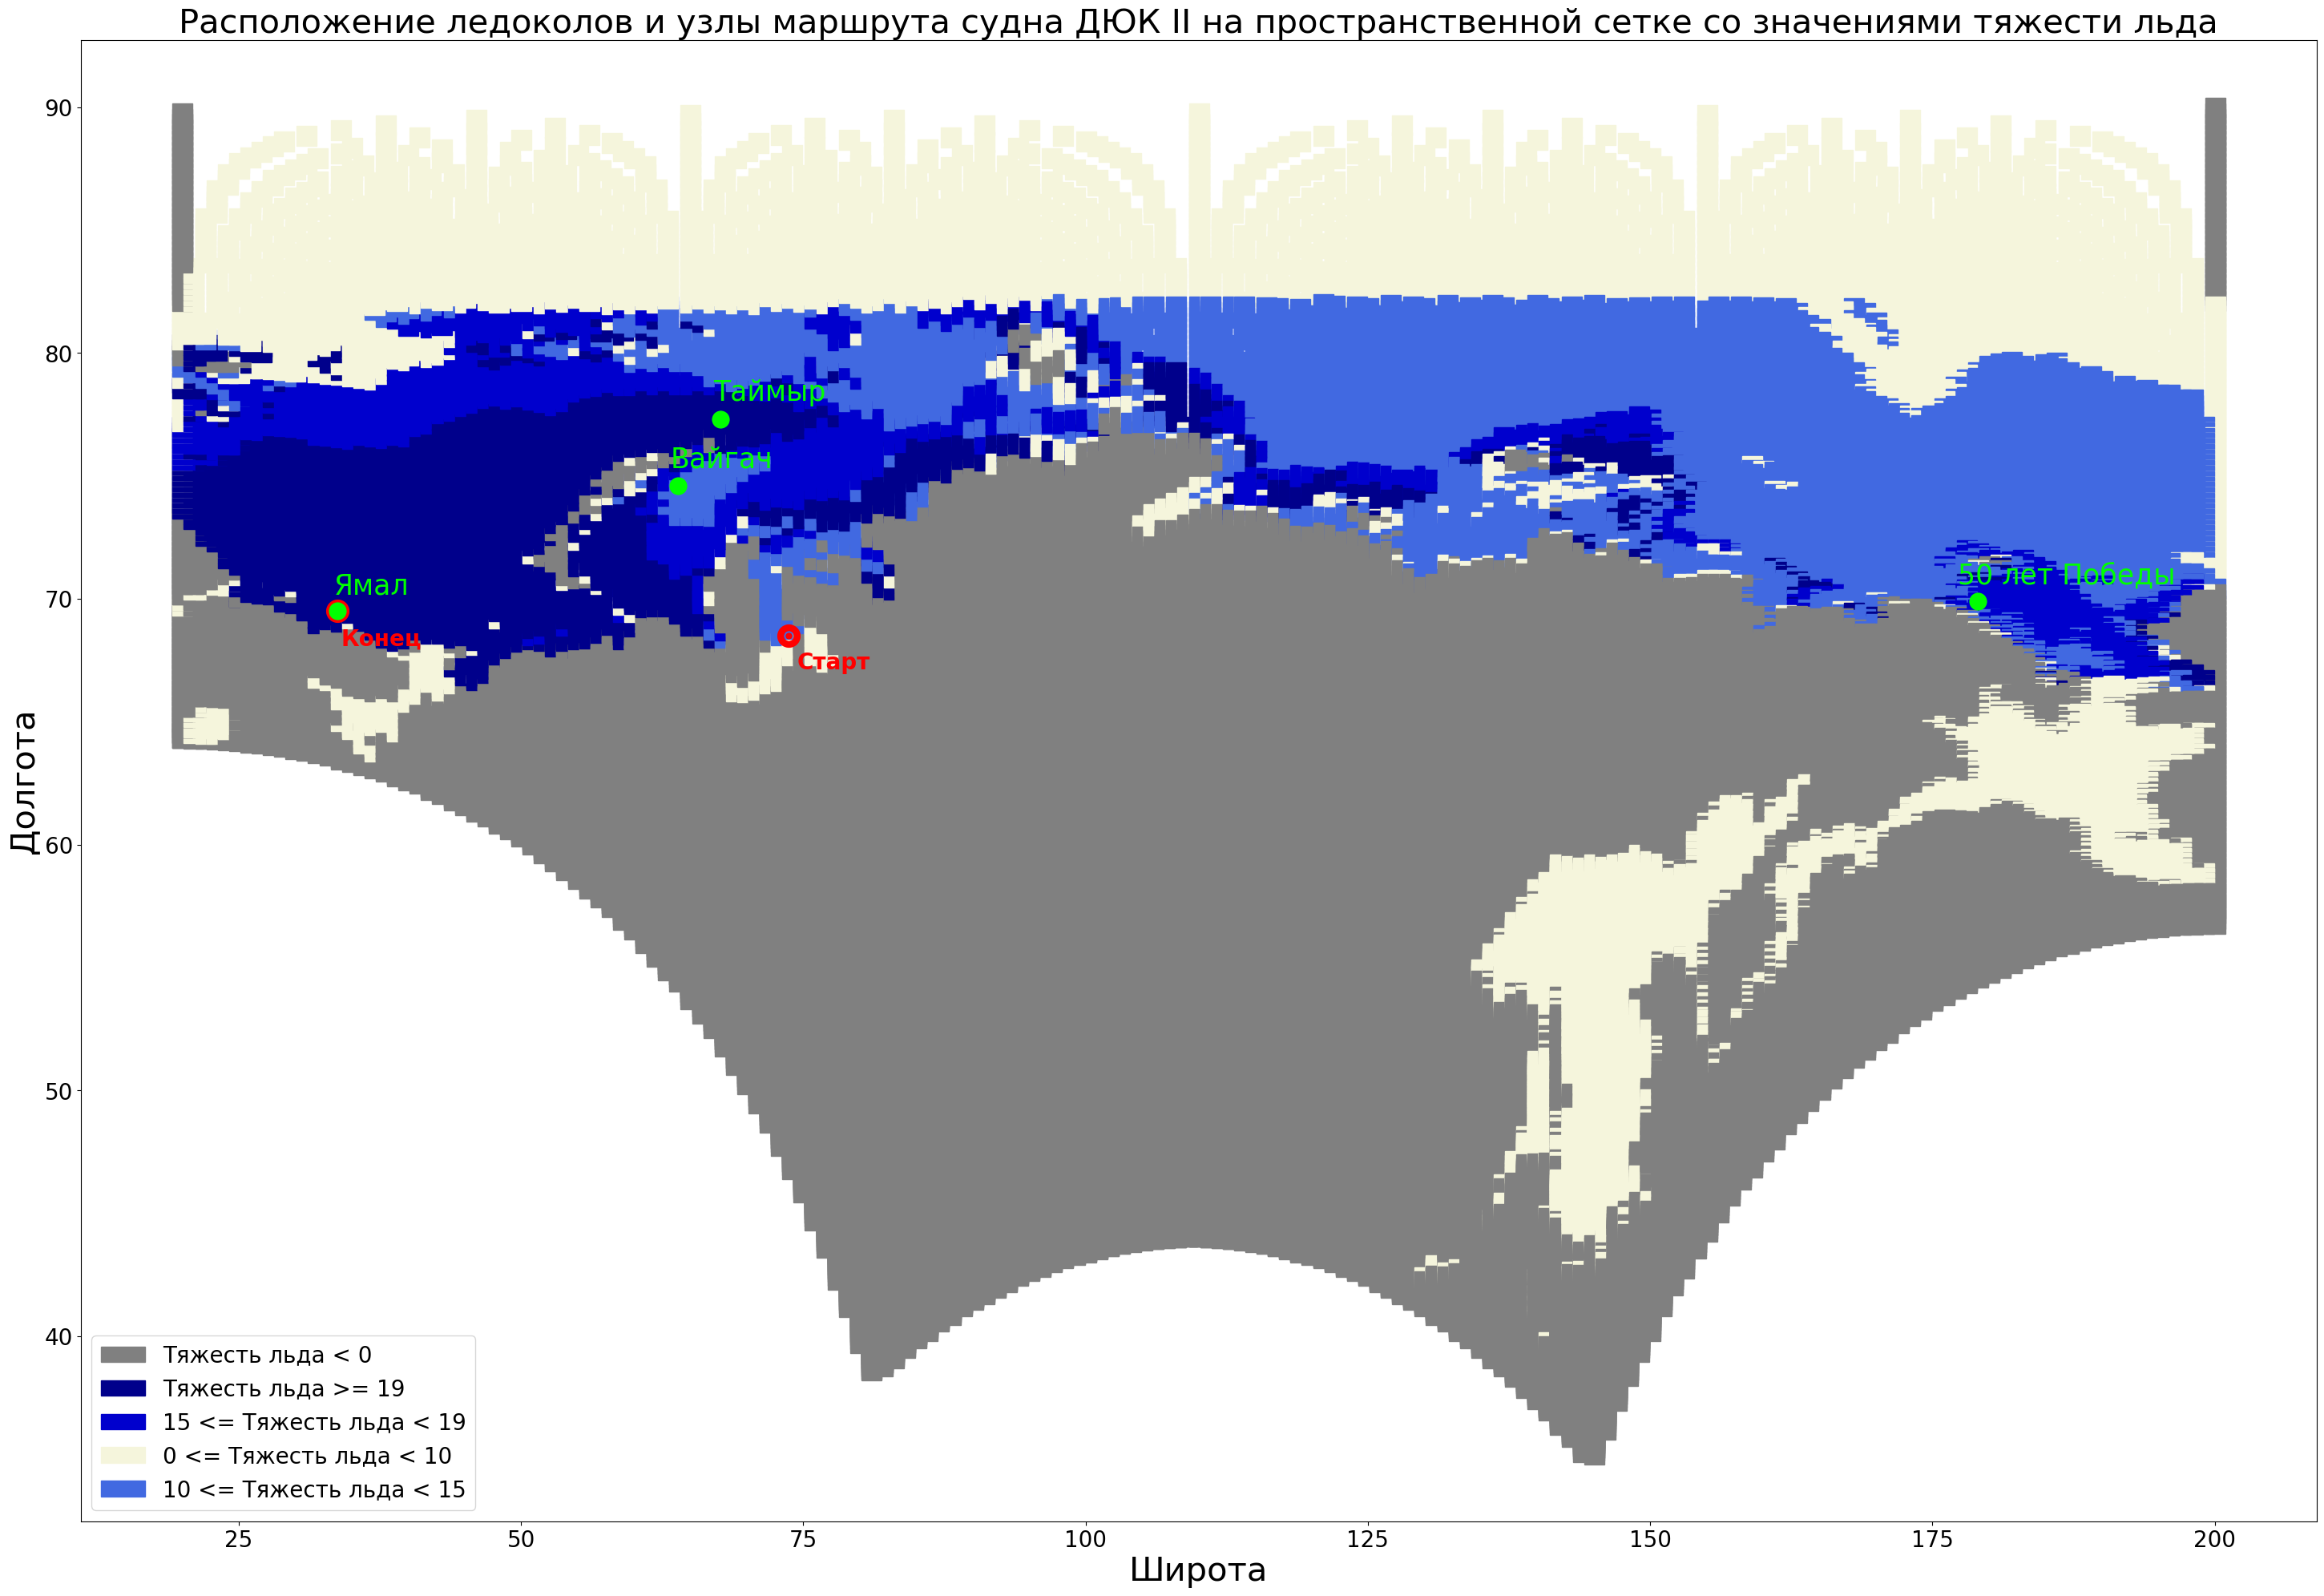

In [32]:
Velocity_day = pd.read_excel(path_excel, sheet_name=xls.sheet_names[2], header=None)
color_df = Velocity_day.copy()

color_df[Velocity_day < 0] = 'gray'
color_df[(Velocity_day >= 0)&(Velocity_day <= 10)] = 'beige'
color_df[(Velocity_day > 10)&(Velocity_day <= 15)] = 'royalblue'
color_df[(Velocity_day > 15)&(Velocity_day <= 19)] = 'mediumblue'
color_df[Velocity_day > 19] = 'darkblue'

fig, ax = plt.subplots(figsize=(36,24))
for i in range(Velocity_lat.shape[0]):
    for j in range(Velocity_lat.shape[1]):
        data_lat = Velocity_lat.iloc[i,j]
        data_lon = Velocity_lon.iloc[i,j]
        color_ = color_df.iloc[i,j]
        ax.plot(data_lon, data_lat, markersize=18,  color=color_, marker ='s', linestyle='None',zorder=1)
        
gray_patch = mpatches.Patch(color='gray', label='Тяжесть льда < 0')
beige_patch = mpatches.Patch(color='beige', label='0 <= Тяжесть льда < 10')
royalblue_patch = mpatches.Patch(color='royalblue', label='10 <= Тяжесть льда < 15')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='15 <= Тяжесть льда < 19')
darkblue_patch = mpatches.Patch(color='darkblue', label='Тяжесть льда >= 19')
plt.legend(handles=[gray_patch,darkblue_patch, mediumblue_patch,beige_patch,royalblue_patch],loc='lower left', prop={'size': 20})

x = shedudle_icebreaker.longitude.values.tolist()
y = shedudle_icebreaker.latitude.values.tolist()
name = shedudle_icebreaker['Наименование'].values.tolist()

x_start = shedudle_ships.iloc[0,:]['longitude_start']
y_start = shedudle_ships.iloc[0,:]['latitude_start']
x_end = shedudle_ships.iloc[0,:]['longitude_end']
y_end = shedudle_ships.iloc[0,:]['latitude_end']


ax.scatter(x_start, y_start, c='r',zorder=2, linewidths=15)
ax.annotate(r'Старт', (x_start, y_start), xytext=(x_start*1.01, y_start*0.98), size=20, c='r', fontweight='bold')
ax.scatter(x_end, y_end, c='r',zorder=2, linewidths=15)
ax.annotate(r'Конец', (x_end, y_end), xytext=(x_end*1.01, y_end*0.98), size=20, c='r', fontweight='bold')

ax.scatter(x, y, c='lime',zorder=3, linewidths=10)
for i, txt_ in enumerate(name):
    ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.99, y[i]*1.01), size=25, c='lime')

plt.title('Расположение ледоколов и узлы маршрута судна ДЮК II на пространственной сетке со значениями тяжести льда', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.show()

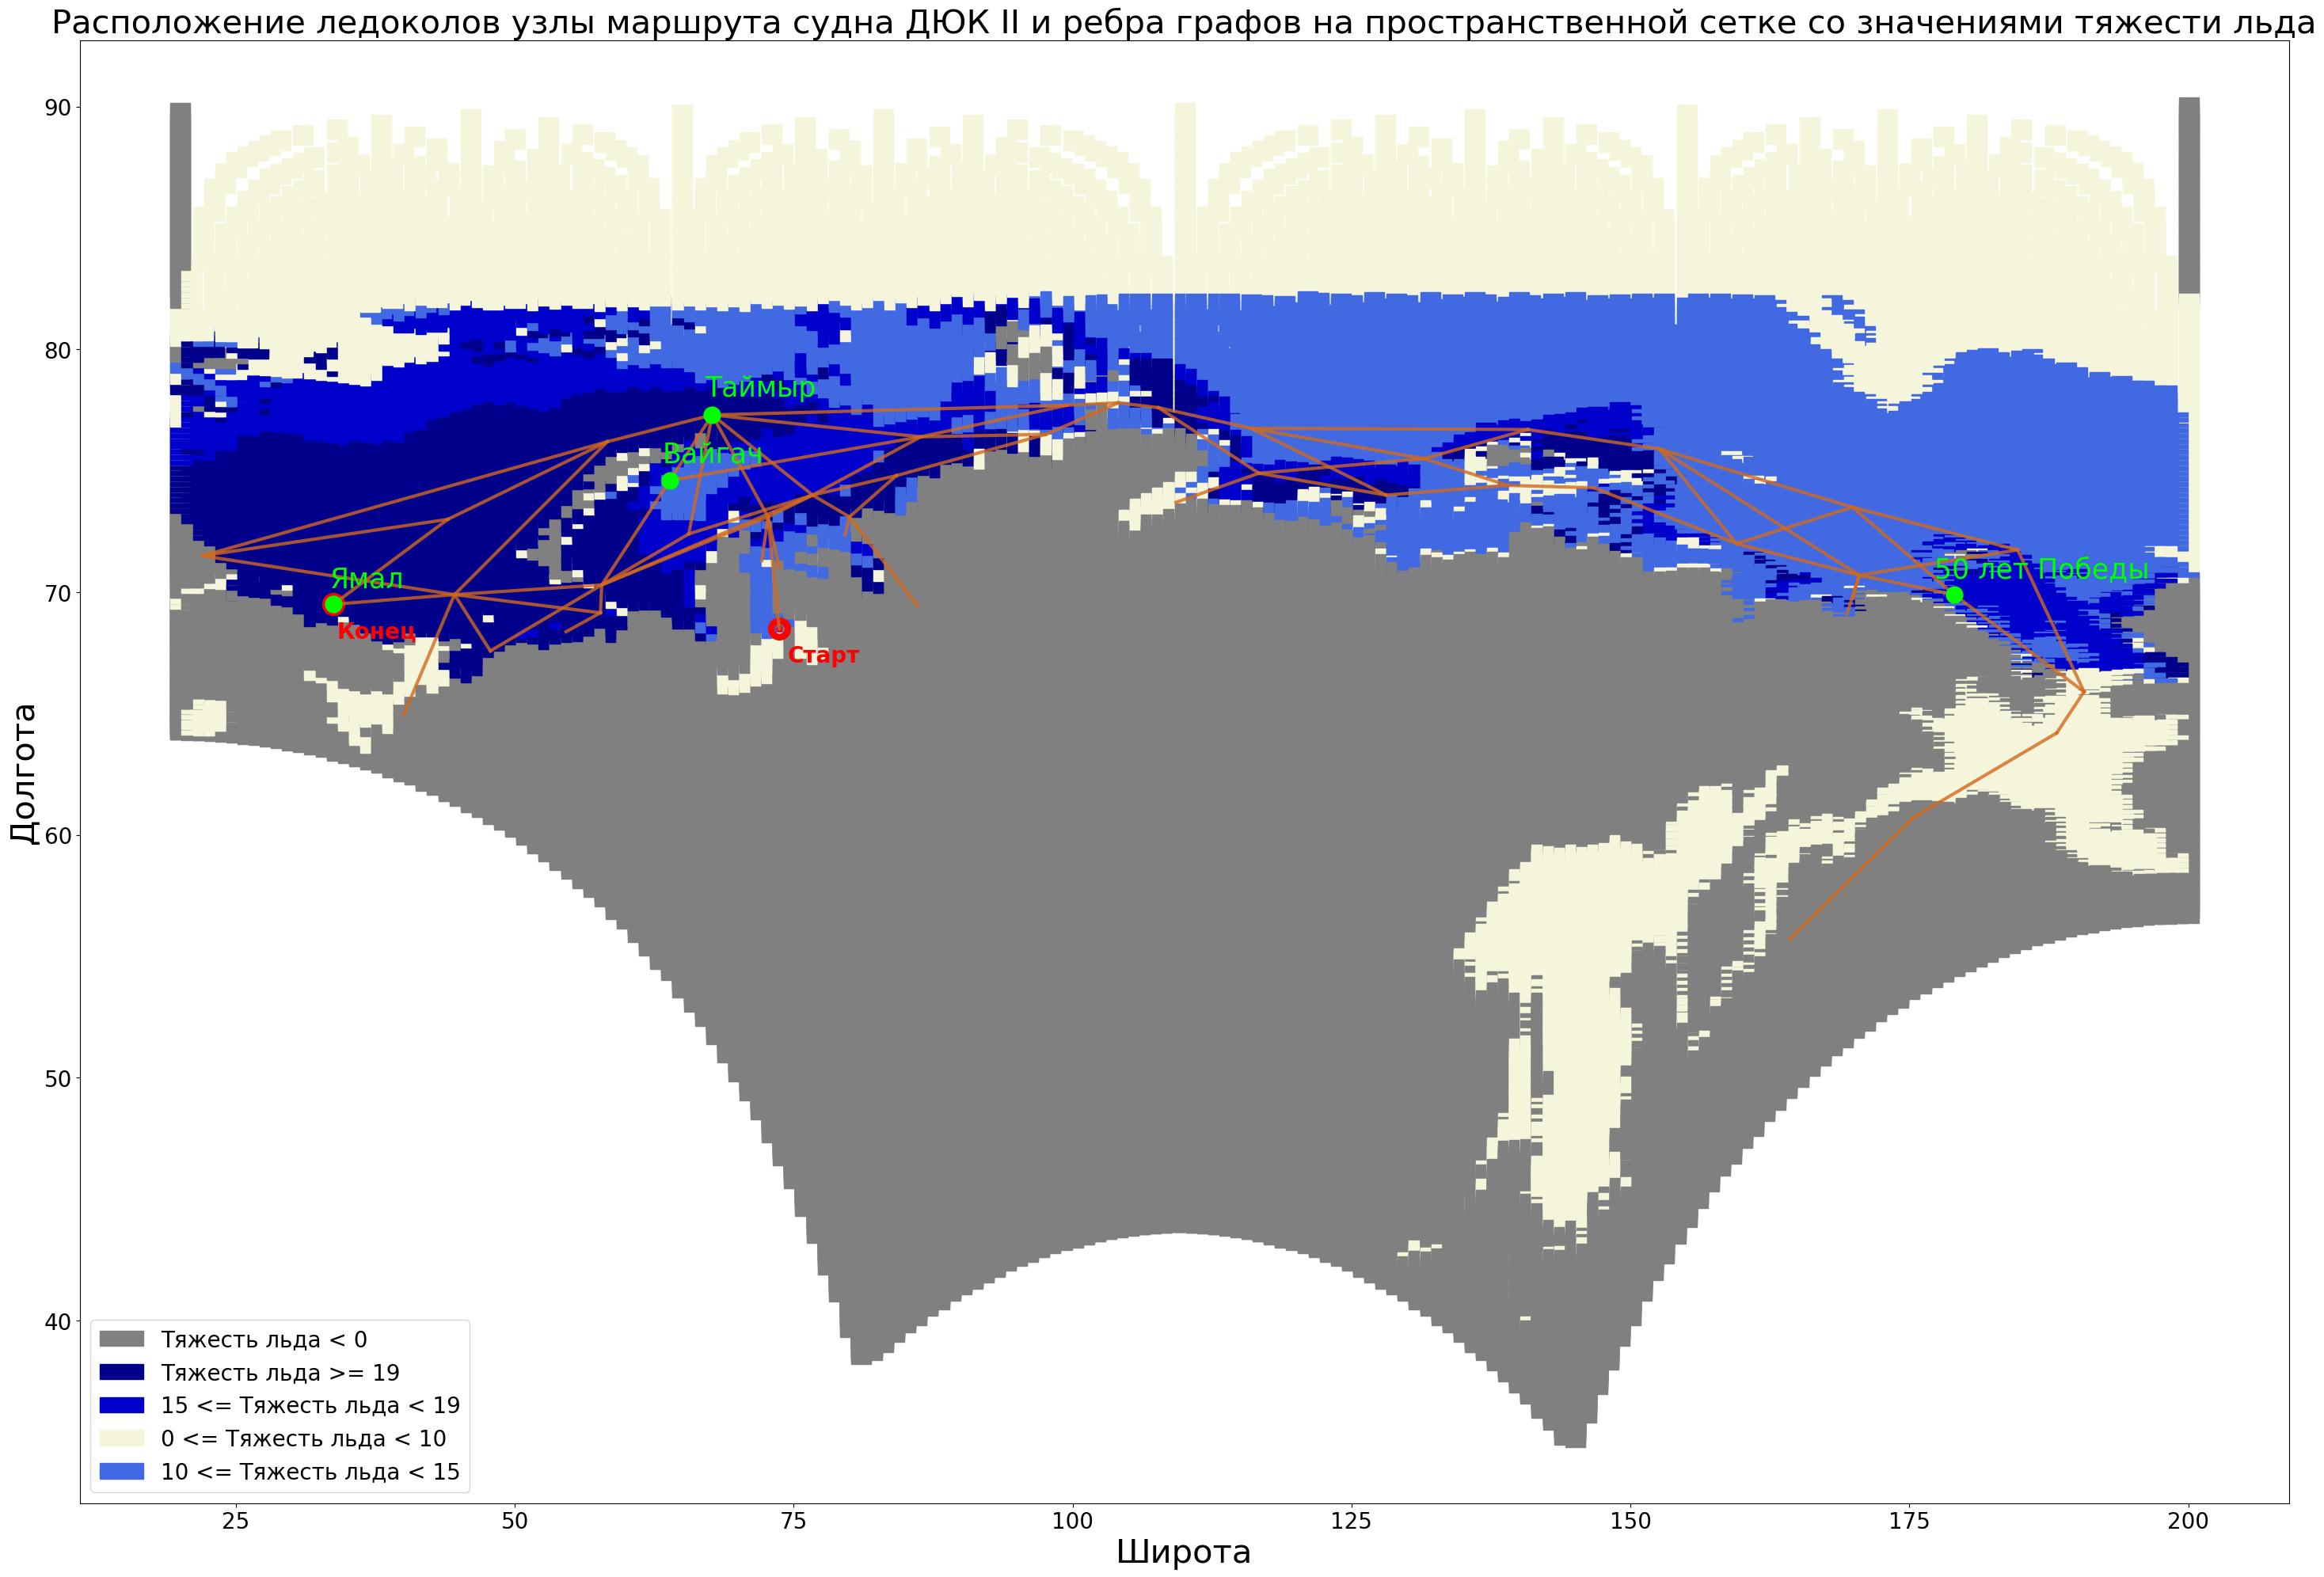

In [34]:
Velocity_day = pd.read_excel(path_excel, sheet_name=xls.sheet_names[2], header=None)
color_df = Velocity_day.copy()

color_df[Velocity_day < 0] = 'gray'
color_df[(Velocity_day >= 0)&(Velocity_day <= 10)] = 'beige'
color_df[(Velocity_day > 10)&(Velocity_day <= 15)] = 'royalblue'
color_df[(Velocity_day > 15)&(Velocity_day <= 19)] = 'mediumblue'
color_df[Velocity_day > 19] = 'darkblue'

fig, ax = plt.subplots(figsize=(36,24))
for i in range(Velocity_lat.shape[0]):
    for j in range(Velocity_lat.shape[1]):
        data_lat = Velocity_lat.iloc[i,j]
        data_lon = Velocity_lon.iloc[i,j]
        color_ = color_df.iloc[i,j]
        ax.plot(data_lon, data_lat, markersize=18,  color=color_, marker ='s', linestyle='None',zorder=1)
        
gray_patch = mpatches.Patch(color='gray', label='Тяжесть льда < 0')
beige_patch = mpatches.Patch(color='beige', label='0 <= Тяжесть льда < 10')
royalblue_patch = mpatches.Patch(color='royalblue', label='10 <= Тяжесть льда < 15')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='15 <= Тяжесть льда < 19')
darkblue_patch = mpatches.Patch(color='darkblue', label='Тяжесть льда >= 19')
plt.legend(handles=[gray_patch,darkblue_patch, mediumblue_patch,beige_patch,royalblue_patch],loc='lower left', prop={'size': 20})

x = shedudle_icebreaker.longitude.values.tolist()
y = shedudle_icebreaker.latitude.values.tolist()
name = shedudle_icebreaker['Наименование'].values.tolist()

x_start = shedudle_ships.iloc[0,:]['longitude_start']
y_start = shedudle_ships.iloc[0,:]['latitude_start']
x_end = shedudle_ships.iloc[0,:]['longitude_end']
y_end = shedudle_ships.iloc[0,:]['latitude_end']


ax.scatter(x_start, y_start, c='r',zorder=2, linewidths=15)
ax.annotate(r'Старт', (x_start, y_start), xytext=(x_start*1.01, y_start*0.98), size=20, c='r', fontweight='bold')
ax.scatter(x_end, y_end, c='r',zorder=2, linewidths=15)
ax.annotate(r'Конец', (x_end, y_end), xytext=(x_end*1.01, y_end*0.98), size=20, c='r', fontweight='bold')

ax.scatter(x, y, c='lime',zorder=3, linewidths=10)
for i, txt_ in enumerate(name):
    ax.annotate(txt_, (x[i], y[i]), xytext=(x[i]*0.99, y[i]*1.01), size=25, c='lime')

# Построение ребер графа
for j in range(len(graph_edges)):
    start_point = graph_edges.iloc[j,:].start_point_id
    end_point = graph_edges.iloc[j,:].end_point_id
    start_data = graph_points[graph_points.point_id == start_point][['latitude','longitude']]
    x1 = start_data.longitude.values.tolist()
    y1 = start_data.latitude.values.tolist()
    end_data = graph_points[graph_points.point_id == end_point][['latitude','longitude']]
    x2 = end_data.longitude.values.tolist()
    y2 = end_data.latitude.values.tolist()
    ax.plot([x1, x2], [y1, y2], zorder=2, color='chocolate', linewidth=3, alpha=0.8)


plt.title('Расположение ледоколов узлы маршрута судна ДЮК II и ребра графов на пространственной сетке со значениями тяжести льда', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.show()

По графику выше видно, что некоторые ребра графа находятся в местах, где тяжесть льда <10. Это означает, что корабли не могут пройти данные ребра с ледоколами. Узлы графа, которые находятся в зоне с тяжестью льда <10 выведены ниже.

In [ ]:
from transform_coord_to_grid import compute_grid_coord, load_table_lat_lon

lat, lon = load_table_lat_lon('IntegrVelocity.xlsx')

In [47]:
name_point = []
sheet_name = xls.sheet_names[2:]
for i in range(len(graph_points)):
    data = graph_points.iloc[i,1:4]
    # Строка и ячейка пространственной карты соответствующая ширине и долготе узла графа 
    result_ = compute_grid_coord(table_lat=lat, table_lon=lon, lat=data.latitude, lon=data.longitude, delta=0.2)
    for name in sheet_name:
        Velocity_day = pd.read_excel(path_excel, sheet_name=name, header=None)
        if Velocity_day.iloc[result_[0],result_[1]] < 10 :
            name_point.append(data.point_name)
            break

In [51]:
print(f'Название узлов, которые находятся в местах, где тяжесть льда < 10: \n{name_point}')

Название узлов, которые находятся в местах, где тяжесть льда < 10: 
['Дудинка', 'Окно в Европу', 'Новый порт', 'пролив Вилькицкого - восток', 'Архангельск', 'Хатангский залив', 'терминал Утренний', 'Берингово', 'кромка льда на Востоке', 'Рейд Певек', 'Берингов пролив', 'Окно в Азию']


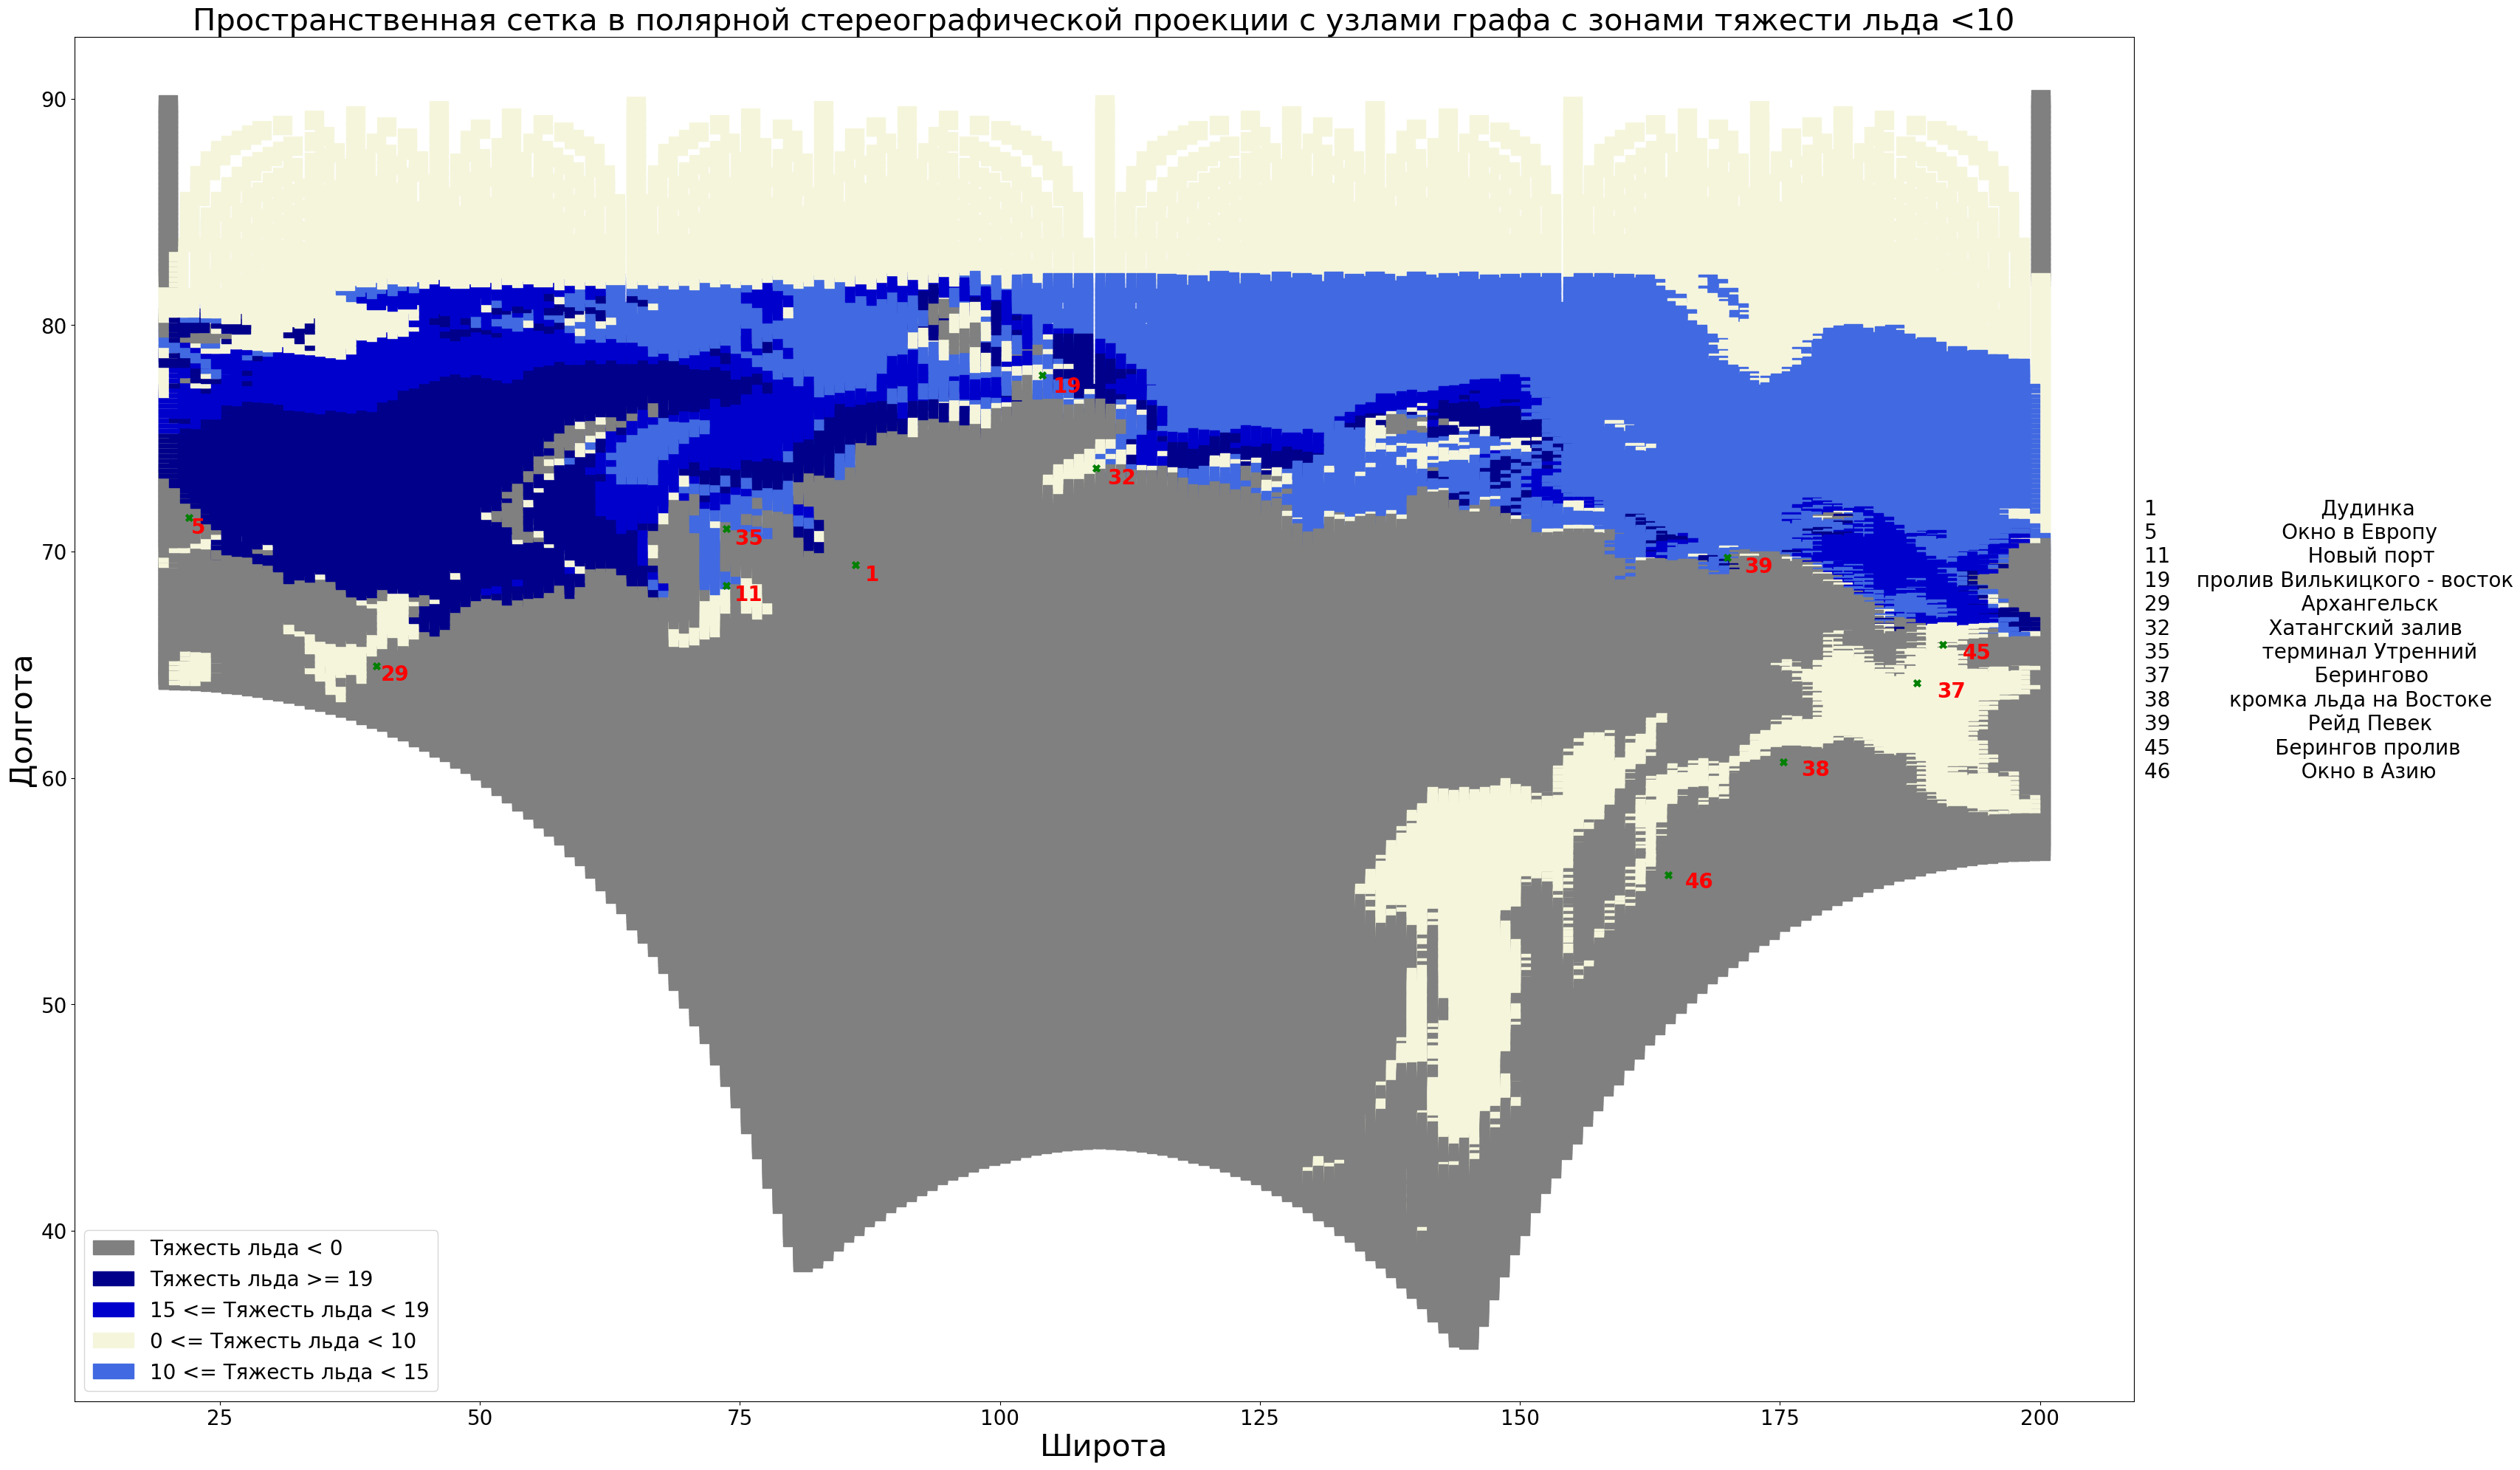

In [65]:
fig, ax = plt.subplots(figsize=(36,24))
color_df = Velocity_day.copy()

color_df[Velocity_day < 0] = 'gray'
color_df[(Velocity_day >= 0)&(Velocity_day <= 10)] = 'beige'
color_df[(Velocity_day > 10)&(Velocity_day <= 15)] = 'royalblue'
color_df[(Velocity_day > 15)&(Velocity_day <= 19)] = 'mediumblue'
color_df[Velocity_day > 19] = 'darkblue'

for i in range(Velocity_lat.shape[0]):
    for j in range(Velocity_lat.shape[1]):
        data_lat = Velocity_lat.iloc[i,j]
        data_lon = Velocity_lon.iloc[i,j]
        color_ = color_df.iloc[i,j]
        ax.plot(data_lon, data_lat, markersize=18,  color=color_, marker ='s', linestyle='None',zorder=1)

for name in name_point:
    data_ = graph_points[graph_points.point_name == name]
    x = data_.longitude.values
    y = data_.latitude.values
    txt = int(data_.point_id.values)
    ax.scatter(x, y, c='g',zorder=2, marker='x', linewidths=3)
    ax.annotate(txt, (x, y), xytext=(x*1.01, y*0.99), size=20, c='r', fontweight='bold')

gray_patch = mpatches.Patch(color='gray', label='Тяжесть льда < 0')
beige_patch = mpatches.Patch(color='beige', label='0 <= Тяжесть льда < 10')
royalblue_patch = mpatches.Patch(color='royalblue', label='10 <= Тяжесть льда < 15')
mediumblue_patch = mpatches.Patch(color='mediumblue', label='15 <= Тяжесть льда < 19')
darkblue_patch = mpatches.Patch(color='darkblue', label='Тяжесть льда >= 19')

plt.legend(handles=[gray_patch,darkblue_patch, mediumblue_patch,beige_patch,royalblue_patch],loc='lower left', prop={'size': 20})
plt.text(210, 60, f'{graph_points[graph_points.point_name.isin(name_point)].point_name.to_string()}', fontsize = 20)
plt.title('Пространственная сетка в полярной стереографической проекции c узлами графа с зонами тяжести льда <10', fontsize=30)
plt.xlabel('Широта', fontsize=30)
plt.xticks(fontsize = 20)
plt.ylabel('Долгота', fontsize=30)
plt.yticks(fontsize = 20)
plt.show()

## Заключение

1. Построена пространственная сетка в стереографической проекции. <br>
2. Построены примеры пространственных сеток с отображением значений тяжести льда в разные периоды времени. <br>
3. Построены узлы и ребра графа вероятных маршрутов взятых из исторических данных. <br>
4. Построены положения ледоколов, начальная и конечная точка маршрута для первого корабля из заявок ДЮК II.<br>
При анализе данных обнаружилась отрицательное значение положения для узла Берингов пролив. При анализе пространственной карты с отображением тяжести льда было замечено, что имеются узлы графа, которые находятся в зонах где тяжесть льда <10. По ТЗ данные области непроходимы.